# Question 2

### Perceptron Learning Algorithm
Perceptron is an algorithm for binary classification of inputs. A binary classifer separates the given inputs according to which class they belong. It is a weighted function of the input feature vectors. Given the initial input feature vector, a linear predictor function is generated (hyperplane) whose updation rule depends on whether the chosen input lies above or below the hyperplane. 

For PLA to converge, it is necessary that the data is linearly separable. For this purpose we construct two clusters from Gaussian Distribution with different mean and standard deviation. A weight vector is initialized (here,zero) and we check if given the initialized weight vector, does our linear classifer label our inputs according to their class (labels) correctly. If it doesn't, an updation rule is provided till it classifes all the inputs correctly.

Here, the labels are $\mathcal{y}\in\{-1,1\}$ and the classifier labels correctly if, $\mathcal{y*(w^Tx)}$, where $\mathcal{w}$ and $\mathcal{x}$ are weight and input vectors respectively. The updation rule if labelled incorrectly is given as,
$$\mathcal{w_{i+1}} = \mathcal{w_i} + \mathcal{y*x_i}$$

A visualization is shown : 
![Perceptron](img/perceptron.png "Geometric Intuition")  Source: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html

In [300]:
import mt_prng as mt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

seed = mt.mt_seed(5489)

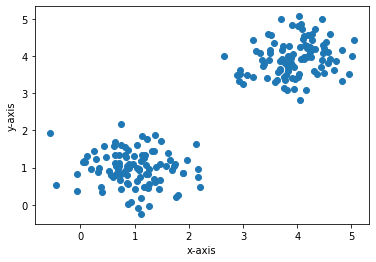

In [307]:
mu_1,sigma_1 = 4,0.5          #Mean and standard deviation for the clusters
mu_2,sigma_2 = 1,0.5

x_0 = np.ones(plot.shape[0])                        #An extra input feature of all ones
plot_1 = np.random.normal(mu_1,sigma_1,[100,2])     #Input feature vector of first class
plot_2 = np.random.normal(mu_2,sigma_2,[100,2])     #Input feature vector of second class
plot = np.concatenate((plot_1,plot_2),axis=0)       #Combining the two clusters
plot = np.column_stack((x_0,plot))                  #Combining the extra input feature

weights = np.zeros(plot.shape[1])                   #Initializing the weight vector of all zeros

labels = []                                         #Labelling the inputs
for i in range(plot.shape[0]):
    if i < (plot.shape[0])/2:
        labels.append(1)
    else :
        labels.append(-1)


plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.scatter(plot[:,1],plot[:,2])

In [308]:
weights_temp = []     #Empty list to capture all the updated weights


'''Perceptron Learning Algorithm'''
while True:                                            #loop till all inputs are classified correctly
    m=0
    for i in range(len(labels)):                       #Loop through all inputs
        if labels[i]*(np.dot(weights,plot[i])) <=0:    #If labels are misclassified
            weights = weights + labels[i]*plot[i]      #Updating rule
            weights_temp.append(weights)               #Appending to list after every change in weights
            m+=1
    if m == 0:
        break

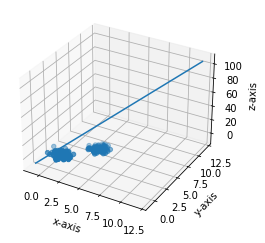

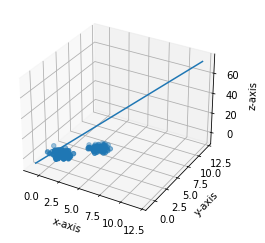

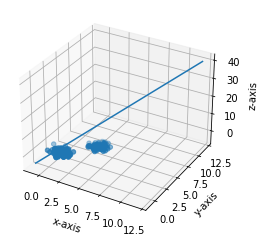

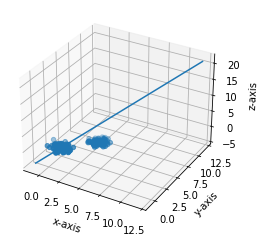

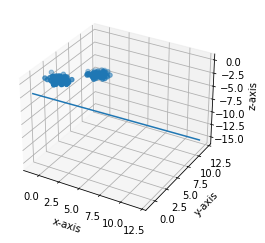

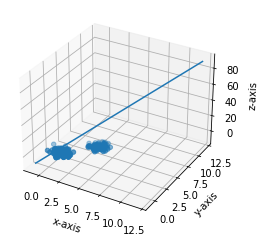

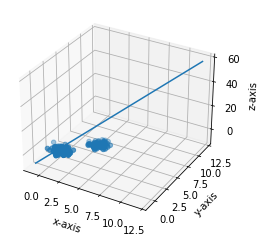

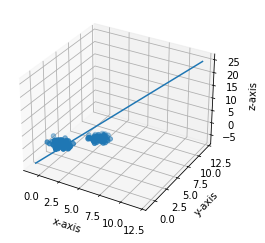

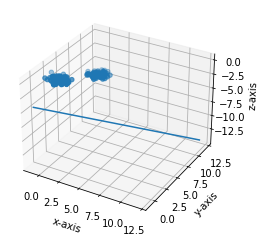

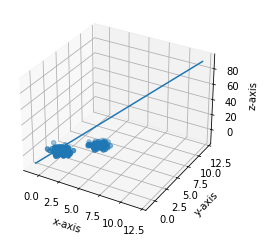

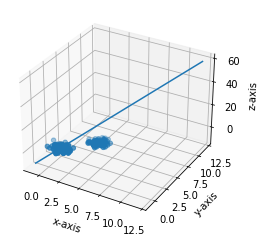

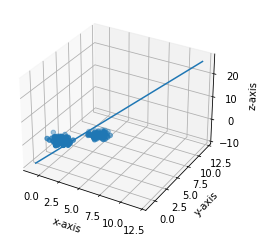

In [313]:
'''Plotting the hyperplane along with the clusters'''

ptt_x_1=  np.linspace(-1,12,100)
ptt_x_2 = np.linspace(-1,12,100)
for pp in range(len(weights_temp)):
    ptt_y = weights_temp[pp][0] + weights_temp[pp][1]*ptt_x_1 + weights_temp[pp][2]*ptt_x_2
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.plot(ptt_x_1, ptt_x_2, ptt_y)
    ax.scatter(plot[:,1],plot[:,2])

### We can visually see the convergence of Perceptron Learning Algorithm. It updates till all the inputs are classified correctly

###### B

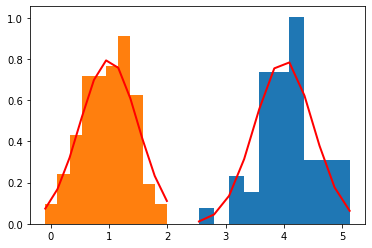

In [306]:
'''Plotting the Gaussian PDF for the two clusters with different means and standard deviation'''

count_2, bins_2, ignored_2 = plt.hist(plot_1[:,0], density= True)
plt.plot(bins_2, 1/(sigma_1 * np.sqrt(2 * np.pi)) *
              np.exp( - (bins_2- mu_1)**2 / (2 * (sigma_1)**2) ),
          linewidth=2, color='r')
count, bins, ignored = plt.hist(plot_2[:,0], density= True)
plt.plot(bins, 1/(sigma_2 * np.sqrt(2 * np.pi)) *
              np.exp( - (bins- mu_2)**2 / (2 * (sigma_2)**2) ),
          linewidth=2, color='r')

From the above plotted PDF of Guassian Distribution with different means and standard deviation we observe and know that the probability of getting a point is never zero, however small it may be. Therefore, it depends on the instance of a Gaussian distribution to obtain a linear separable dataset.

###### C
Linear Regression will not converge for this classification problem because it aims to minimize the distance between predicted value and target value. It can also be seen from the fact that in classification problem, our labels are discrete and have only two values whereas in linear regression the values are continous and can range from any value. In our dataset of two clusters, linear regression will pass through both the clusters thereby minimizing the squared distance and classify our points incorrectly.